## Preamble

In [2]:
from matplotlib.figure import Figure
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd

In [7]:
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [6]:
spop_hues = {
    'AFR': '#9f1fff',
    'AMR': '#dfbf1f',
    'EAS': '#1fbf1f',
    'EUR': '#000000',
    'QAT': '#df1f1f',
    'SAS': '#1f3fff'
}

legend_format = {
  'xdata': [0],
  'ydata': [0],
  'marker': '.',
  'color': 'w',
  'markersize': 16
}

# Initial 1KGQ PCA

In [9]:
refdf = pd.read_csv('1KGQ_common_pop_phased.pca_pop.tsv')

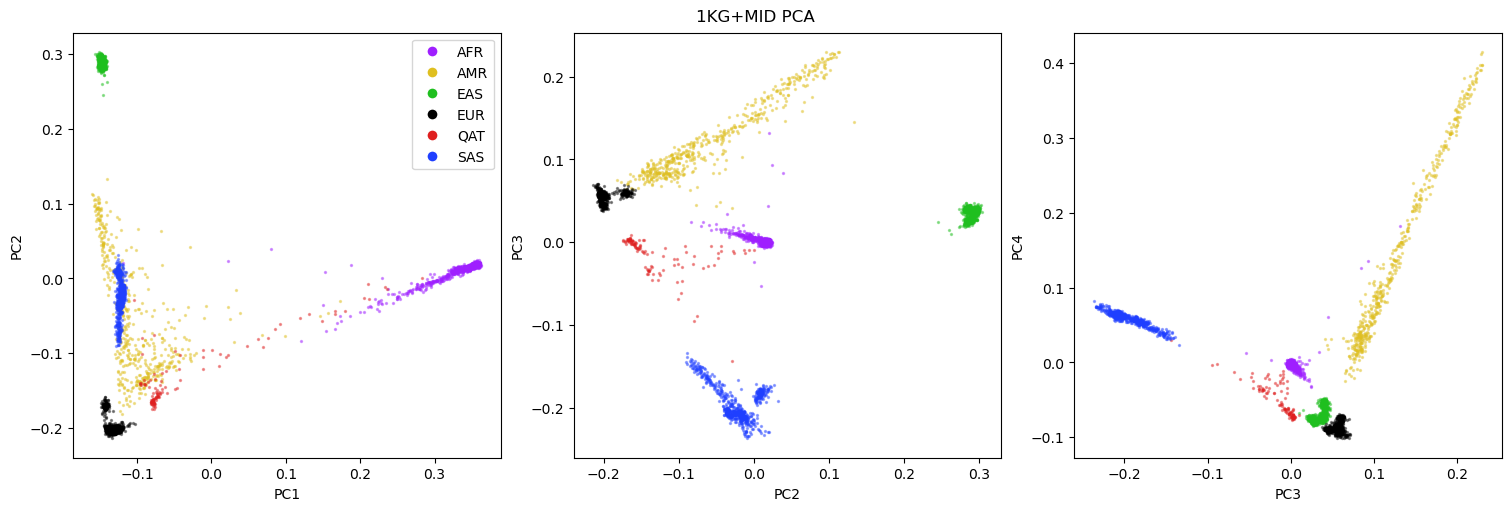

In [13]:
fig = Figure(figsize=(15,5), layout='constrained')
axs = fig.subplots(1,3, squeeze=True)

for i, j in [[1,2], [2,3], [3,4]]:
  PCi = 'PC' + str(i)
  PCj = 'PC' + str(j)
  for n, p in refdf.groupby('Population'):
    axs[i-1].scatter(p[PCi], p[PCj], color=spop_hues[n], s=2, alpha=0.4)
  axs[i-1].set(xlabel=PCi, ylabel=PCj)

legend_elements = [Line2D(**legend_format, markerfacecolor=c, label=p) for p, c in spop_hues.items()]
axs[0].legend(handles=legend_elements)
fig.suptitle('1KG+MID PCA')
fig

## Case Projection

In [6]:
from google.cloud.storage.fileio import BlobReader
from collections import defaultdict as ddict
import posixpath as path
import os

In [7]:
cdir = os.getcwd()
os.chdir(os.path.join('..', '..', 'scripts'))
import kterra as kt
os.chdir(cdir)

In [8]:
ws = kt.Workspace('KAnderson_Qatari_WGS_Ref_Curation')
pref = path.join('gs://', ws.bucket) + '/'
cases = ws.get_table('test_case')

,population_2,pca,pca_2,grafpop_ancestry,population,filtered_vcf_index_hg38_kit,imputed_vcf_index,filtered_vcf_hg38_kit,glimpse2_imputed_info_updated_vcf_idx,imputed_vcf,glimpse2_imputed_info_updated_vcf
id,,,,,,,,,,,
0194951ee3a5,NaN,gs://fc-383cdc04-2139-475e-ad85-406c08033859/s...,NaN,NaN,AFR,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,NaN,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,NaN,NaN,NaN
0862612af556,NaN,gs://fc-383cdc04-2139-475e-ad85-406c08033859/s...,NaN,NaN,AFR,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,NaN,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,NaN,NaN,NaN
0b62d7f7dfaf,NaN,gs://fc-383cdc04-2139-475e-ad85-406c08033859/s...,NaN,NaN,AFR,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,NaN,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,NaN,NaN,NaN
10011001_620417412506_FS05331828,AMR,gs://fc-383cdc04-2139-475e-ad85-406c08033859/s...,gs://fc-383cdc04-2139-475e-ad85-406c08033859/s...,European,AFR,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,NaN,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,NaN,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...
10011017_620550989906_FS05335407,QAT,gs://fc-383cdc04-2139-475e-ad85-406c08033859/s...,gs://fc-383cdc04-2139-475e-ad85-406c08033859/s...,European,AFR,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,NaN,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,NaN,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...
10011020_620550990006_FS05335137,EUR,gs://fc-383cdc04-2139-475e-ad85-406c08033859/s...,gs://fc-383cdc04-2139-475e-ad85-406c08033859/s...,European,AFR,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,NaN,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,NaN,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...
10011021_620482080402_FS05332423,QAT,gs://fc-383cdc04-2139-475e-ad85-406c08033859/s...,gs://fc-383cdc04-2139-475e-ad85-406c08033859/s...,European,AFR,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,NaN,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,NaN,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...
10011027_620550989306_FS05331836,QAT,gs://fc-383cdc04-2139-475e-ad85-406c08033859/s...,gs://fc-383cdc04-2139-475e-ad85-406c08033859/s...,European,AFR,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,NaN,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,NaN,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...
10011039_620529725102_FS05332483,NaN,gs://fc-383cdc04-2139-475e-ad85-406c08033859/s...,NaN,NaN,AFR,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,NaN,gs://fc-d56da928-b756-42ea-a610-50aaeaf162ae/s...,NaN,NaN,NaN


In [9]:
case_data = None

for eid, pca_res in cases['pca_2'].items():
  if pd.isna(pca_res): continue
  bucket_path = pca_res.removeprefix(pref)
  blob = ws.folder.gbucket.get_blob(bucket_path)
  with BlobReader(blob) as inp:
    df = pd.read_csv(inp, sep='\t', index_col=0)
  if case_data is None: case_data = df
  else: case_data.loc[eid] = df.iloc[0]

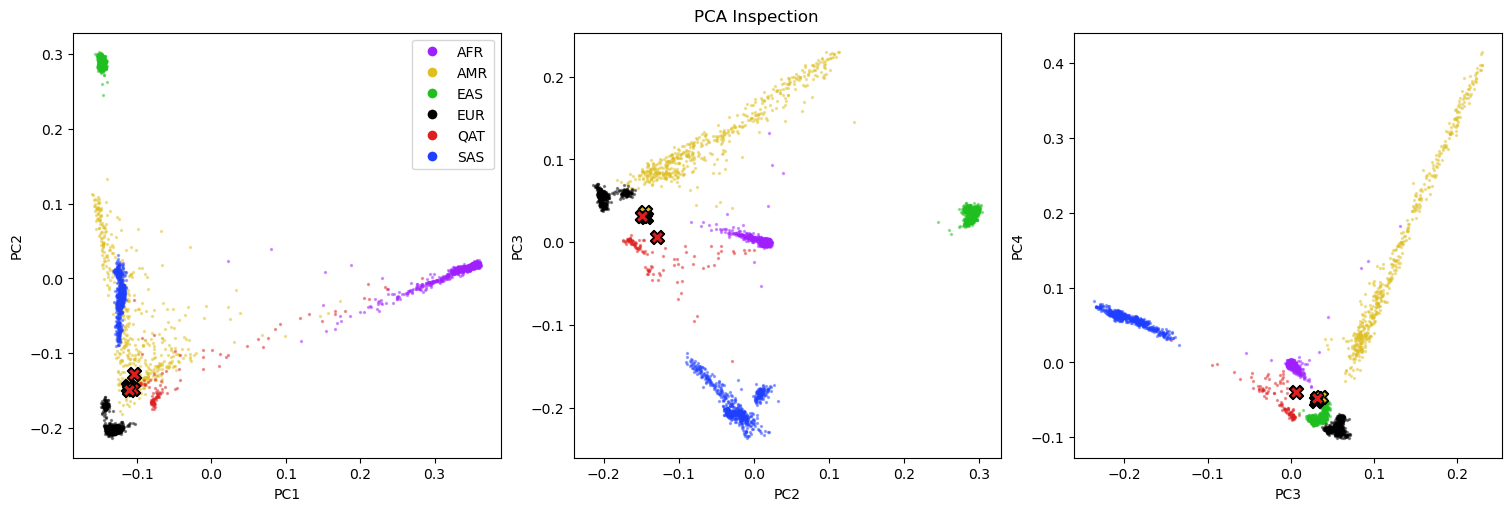

In [ ]:
for i, j in [[1,2], [2,3], [3,4]]:
  PCi = 'PC' + str(i)
  PCj = 'PC' + str(j)
  for n, p in case_data.groupby('Population'):
    axs[i-1].scatter(p[PCi], p[PCj], color=spop_hues[n], s=9**2, alpha=1, marker='X', edgecolors='k')
  axs[i-1].set(xlabel=PCi, ylabel=PCj)

fig

In [22]:
axs[0].set(xbound=(None, 0), ybound=(None,0))
axs[1].set(xbound=(None,0), ybound=(-0.1,0.15))
axs[2].set(xbound=(-0.1,0.15), ybound=(None,0.1))

[None, None]

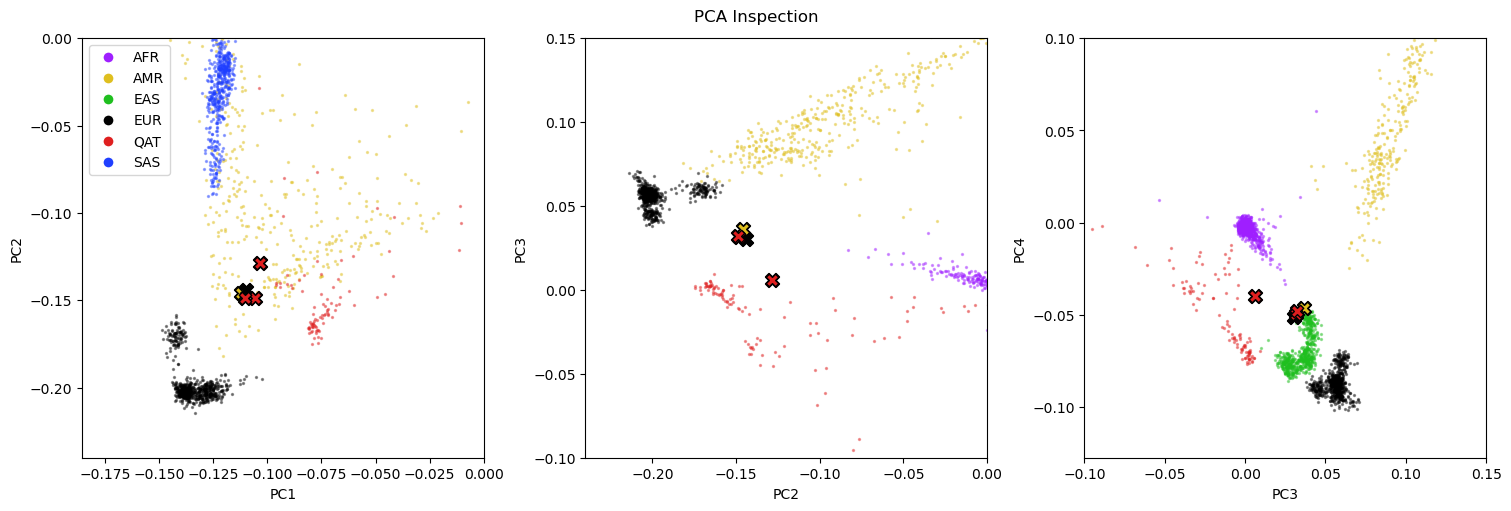

In [23]:
fig

## Replicate

In [14]:
refdf_r = pd.read_csv('1KGQ_common_pop_phased.pca_pop (1).tsv')

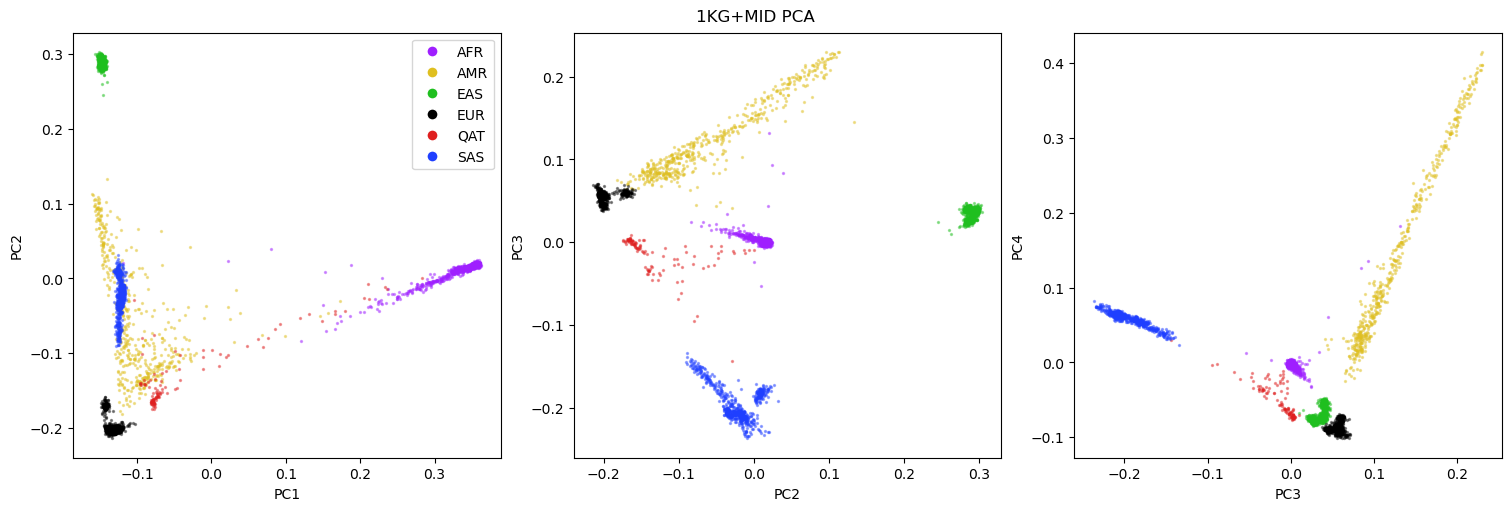

In [15]:
fig = Figure(figsize=(15,5), layout='constrained')
axs = fig.subplots(1,3, squeeze=True)

for i, j in [[1,2], [2,3], [3,4]]:
  PCi = 'PC' + str(i)
  PCj = 'PC' + str(j)
  for n, p in refdf_r.groupby('Population'):
    axs[i-1].scatter(p[PCi], p[PCj], color=spop_hues[n], s=2, alpha=0.4)
  axs[i-1].set(xlabel=PCi, ylabel=PCj)

legend_elements = [Line2D(**legend_format, markerfacecolor=c, label=p) for p, c in spop_hues.items()]
axs[0].legend(handles=legend_elements)
fig.suptitle('1KG+MID PCA')
fig

# 1KG PCA

In [4]:
refdf2 = pd.read_csv('1KG_common.pca_pop.tsv')

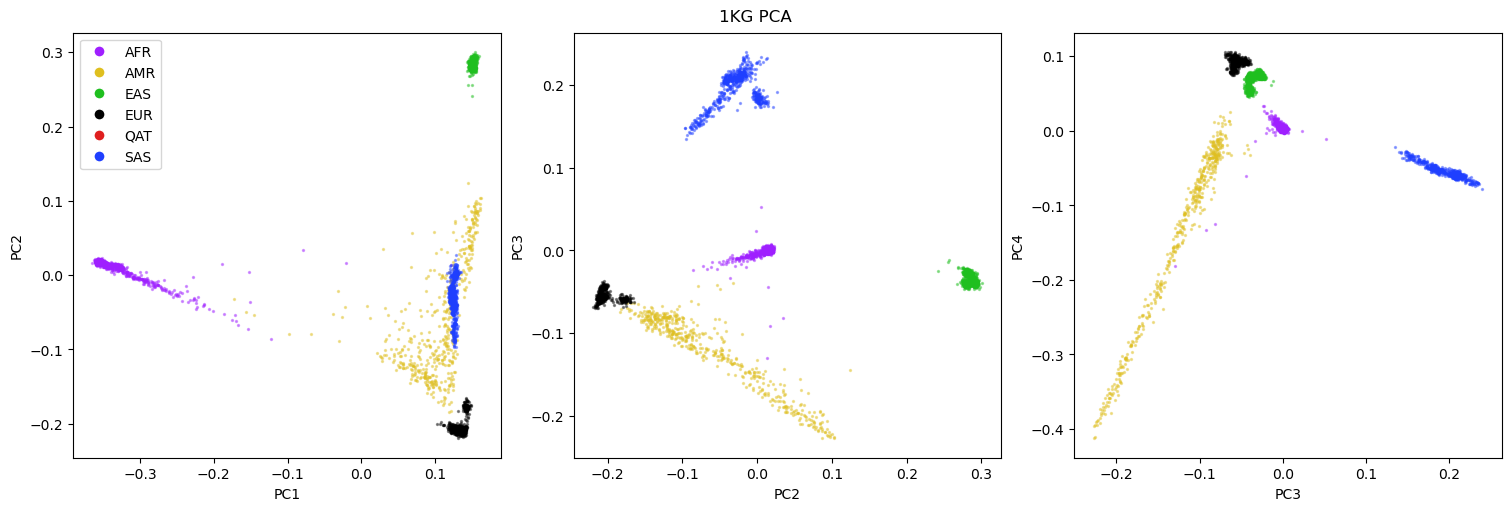

In [11]:
fig = Figure(figsize=(15,5), layout='constrained')
axs = fig.subplots(1,3, squeeze=True)

for i, j in [[1,2], [2,3], [3,4]]:
  PCi = 'PC' + str(i)
  PCj = 'PC' + str(j)
  for n, p in refdf2.groupby('Population'):
    axs[i-1].scatter(p[PCi], p[PCj], color=spop_hues[n], s=2, alpha=0.4)
  axs[i-1].set(xlabel=PCi, ylabel=PCj)

legend_elements = [Line2D(**legend_format, markerfacecolor=c, label=p) for p, c in spop_hues.items()]
axs[0].legend(handles=legend_elements)
fig.suptitle('1KG PCA')
fig